### Importando as bibliotecas

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
from warnings import simplefilter 
import plotly.express as px
import matplotlib.pyplot as plt
import requests as req

plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

simplefilter("ignore")

### Carregando dataset

In [98]:
df = pd.read_csv('tabela5457.csv',sep=';',header=1)
df_ce = pd.read_csv('tabela5457ce.csv',sep=';',header=1)

### Eliminando NA's

In [99]:
df = df.dropna()
df_ce = df_ce.dropna()

### Exibindo uma prévia do dataframe

In [100]:
df.head(10)

,Município,Produto das lavouras temporárias e permanentes,Ano,Variável,Unnamed: 4
0,Acopiara (CE),Abacate,2016.0,Valor da produção (Mil Reais),-
1,Acopiara (CE),Abacate,2017.0,Valor da produção (Mil Reais),-
2,Acopiara (CE),Abacate,2018.0,Valor da produção (Mil Reais),-
3,Acopiara (CE),Abacate,2019.0,Valor da produção (Mil Reais),-
4,Acopiara (CE),Abacate,2020.0,Valor da produção (Mil Reais),-
5,Acopiara (CE),Abacaxi*,2016.0,Valor da produção (Mil Reais),-
6,Acopiara (CE),Abacaxi*,2017.0,Valor da produção (Mil Reais),-
7,Acopiara (CE),Abacaxi*,2018.0,Valor da produção (Mil Reais),-
8,Acopiara (CE),Abacaxi*,2019.0,Valor da produção (Mil Reais),-
9,Acopiara (CE),Abacaxi*,2020.0,Valor da produção (Mil Reais),-


In [101]:
df_ce.head(10)

,Unidade da Federação,Produto das lavouras temporárias e permanentes,Ano,Variável,Unnamed: 4
0,Ceará,Abacate,2016.0,Valor da produção (Mil Reais),3061
1,Ceará,Abacate,2017.0,Valor da produção (Mil Reais),4360
2,Ceará,Abacate,2018.0,Valor da produção (Mil Reais),6159
3,Ceará,Abacate,2019.0,Valor da produção (Mil Reais),14231
4,Ceará,Abacate,2020.0,Valor da produção (Mil Reais),17724
5,Ceará,Abacaxi*,2016.0,Valor da produção (Mil Reais),3294
6,Ceará,Abacaxi*,2017.0,Valor da produção (Mil Reais),1440
7,Ceará,Abacaxi*,2018.0,Valor da produção (Mil Reais),658
8,Ceará,Abacaxi*,2019.0,Valor da produção (Mil Reais),834
9,Ceará,Abacaxi*,2020.0,Valor da produção (Mil Reais),1944


### Renomeando a coluna alvo

In [102]:
df = df.rename(columns = {'Unnamed: 4': 'Valor','Produto das lavouras temporárias e permanentes':'Produto'}, inplace = False)

df_ce = df_ce.rename(columns = {'Unnamed: 4': 'Valor','Produto das lavouras temporárias e permanentes':'Produto'}, inplace = False)

### Eliminando dados inválidos da coluna alvo

In [103]:
df["Valor"].replace({"-": "0", "--": "0", "...":"0"}, inplace=True)
df_ce["Valor"].replace({"-": "0", "--": "0", "...":"0"}, inplace=True)

### Convertendo a coluna de valor para númerico

In [104]:
df["Valor"] = df[["Valor"]].apply(pd.to_numeric)
df_ce["Valor"] = df_ce[["Valor"]].apply(pd.to_numeric)

In [105]:
df["Ano"] = df["Ano"].astype(int)
df_ce["Valor"] = df_ce[["Valor"]].apply(pd.to_numeric)

### Filtrando apenas registros que possuam valor maior que zero

In [106]:
df = df[df.Valor > 0]
df_ce = df_ce[df_ce.Valor > 0]

In [107]:
df

,Município,Produto,Ano,Variável,Valor
26,Acopiara (CE),Algodão herbáceo (em caroço),2017,Valor da produção (Mil Reais),10
27,Acopiara (CE),Algodão herbáceo (em caroço),2018,Valor da produção (Mil Reais),147
28,Acopiara (CE),Algodão herbáceo (em caroço),2019,Valor da produção (Mil Reais),389
29,Acopiara (CE),Algodão herbáceo (em caroço),2020,Valor da produção (Mil Reais),736
44,Acopiara (CE),Arroz (em casca),2020,Valor da produção (Mil Reais),7
...,...,...,...,...,...
10565,Tauá (CE),Milho (em grão),2016,Valor da produção (Mil Reais),2421
10566,Tauá (CE),Milho (em grão),2017,Valor da produção (Mil Reais),2212
10567,Tauá (CE),Milho (em grão),2018,Valor da produção (Mil Reais),3637
10568,Tauá (CE),Milho (em grão),2019,Valor da produção (Mil Reais),5177


In [108]:
df_ce

,Unidade da Federação,Produto,Ano,Variável,Valor
0,Ceará,Abacate,2016.0,Valor da produção (Mil Reais),3061
1,Ceará,Abacate,2017.0,Valor da produção (Mil Reais),4360
2,Ceará,Abacate,2018.0,Valor da produção (Mil Reais),6159
3,Ceará,Abacate,2019.0,Valor da produção (Mil Reais),14231
4,Ceará,Abacate,2020.0,Valor da produção (Mil Reais),17724
...,...,...,...,...,...
350,Ceará,Uva,2016.0,Valor da produção (Mil Reais),2072
351,Ceará,Uva,2017.0,Valor da produção (Mil Reais),2013
352,Ceará,Uva,2018.0,Valor da produção (Mil Reais),1198
353,Ceará,Uva,2019.0,Valor da produção (Mil Reais),1832


### Analisando o valor da produção Por Produto da Mesorregião

In [109]:
df_pizza = round(df[['Produto','Valor']].groupby(['Produto']).sum().sort_values(by=['Valor','Produto'],ascending=False) / 
df[['Valor']].sum(),2) * 100

In [110]:
df_pizza = df_pizza.reset_index()
fig = px.pie(df_pizza.query("Valor > 0"),values='Valor',names='Produto',title='Distribuição % de produtos')
fig.show()

Baseado na análise acima, podemos concluir que dentro da Mesorregião Sertões Cearenses, considerando o período analisado (últimos cinco anos), a cultura com o maior valor produzido foi a do Milho(em Grão) representando <b>49%</b> de toda a produção.

Outro dado interessante é que as duas principais culturas já respondem por <b>90%</b> de todo o valor produzido no últimos cinco anos.

In [111]:
df_produto_x_mun = df[['Produto','Município','Valor']].groupby(['Produto','Município']).sum().reset_index().sort_values(by='Valor',ascending=False)

In [112]:
df_valor_total_por_produto = df_produto_x_mun[["Produto", "Valor"]].groupby("Produto").sum().reset_index()

In [113]:
fig = px.bar(df_valor_total_por_produto.sort_values("Valor", ascending=False), 
             y='Valor', 
             x='Produto', 
             title="PRODUTOS MAIS PRODUZIDOS ORDENADOS POR VALOR DO PRODUTO")
fig.show()

Nos produtos mais produzidos, podemos observar que milho e feijão, são os mais produzidos nos sertões cearenses, embora sabemos que essas regiões depedem muito de chuva para os plantios.

In [114]:
df_mun_pizza = round(df_produto_x_mun[['Município','Valor']].groupby(['Município']).sum().sort_values(by=['Valor','Município'],ascending=False) / 
df[['Valor']].sum(),2) * 100

In [115]:
df_mun_pizza = df_mun_pizza.reset_index()
fig = px.pie(df_mun_pizza.query("Valor > 0"),values='Valor',names='Município',title='Distribuição % de Municípios')
fig.show()

In [116]:
df_valor_total_por_municipio = df_produto_x_mun[["Município", "Valor"]].groupby("Município").sum().reset_index()

In [117]:
fig = px.bar(df_valor_total_por_municipio.sort_values("Valor", ascending=False), 
             y='Valor', 
             x='Município', 
             title="LOCALIDADES QUE MAIS PRODUZEM")
fig.show()

Tanto no gráfico de barras, quanto no gráfico de pizza, a região de Cratéus se destaca em relação as demais.

### Ranking de produtos por municípios da mesorregião

In [118]:
df_total = pd.DataFrame()
for municipio in df_produto_x_mun['Município'].unique():
    df_total = df_total.append(df_produto_x_mun[df_produto_x_mun['Município'] == municipio].sort_values('Valor',ascending=False).head(3))

#df_total[df_total['Município'] == 'Crateús (CE)'].sort_values(['Município','Valor'],ascending=False)
#df_total.sort_values(['Município','Valor'],ascending=False)

In [119]:
fig = px.bar(df_total.sort_values(['Valor','Município'], ascending=False), 
             x="Município", y="Valor", color="Produto", 
             title="TOP 3 DOS PRODUTOS MAIS PRODUZIDOS POR MUNICIPIO")
fig.show()

Interessante observar que existe uma predominância de uma maior produção de Milho (em grão) e Feijão (Em grão) em praticamente todos os municípios da messoregião Sertões Cearenses. Notamos também que, no munícipio de Crateús, a melância também é um dos 3 produtos mais produzidos e isso se dar porque a melância se dar muito bem em ambientes quentes.

### Plota a série temporal do valor dos produtos ao longo do tempo da mesorregião

In [120]:
df_anual = df[['Ano','Valor']].groupby('Ano').sum().reset_index()

In [121]:
df_anual['Ano'] = df_anual['Ano'].astype(str)

In [122]:
fig = px.line(df_anual, x="Ano", y="Valor", 
              markers=True, title='Evolução da produção por ano')
fig.show()

A análise da produção ano a ano demonstra para o período analisado que apenas no ano de 2018 houve um pequeno descréscimo no valor produzido em relação ao ano anterior. 

No entanto, a média de produção dos últimos 5 anos foi extremamente positiva (22% a.a) com destaque para o ano de 2020 que apresentou um crescimento de 40% em relação ao ano anterior.

### Comparando Produção Sertões Cearenses X Sertões Paraibanos

In [123]:
resp_pib_sertoes_paraibanos = req.get("https://apisidra.ibge.gov.br/values/t/5457/n6/2502003,2502300,2502805,2502904,2504306,2507408,2512804,2513901,2500700,2502102,2502201,2502409,2503308,2503704,2504108,2504405,2505303,2505600,2506608,2509602,2511004,2513307,2513505,2514305,2514503,2515708,2516805,2516904,2500205,2502607,2503407,2504207,2504504,2504801,2505501,2505907,2507002,2508109,2508406,2508802,2510006,2510204,2510402,2510709,2510808,2510907,2511301,2512101,2512606,2513208,2513604,2513802,2514206,2514404,2514602,2516201,2500106,2505402,2506707,2508000,2508703,2509008,2512309,2516607,2516706,2500775,2501153,2502052,2503555,2503753,2509156,2509370,2509396,2512036,2512077,2513356,2513653,2513927,2513968,2513984,2514552,2514651,2517209/v/215/p/last%205/c782/allxt").json()


columns = []
for i in pd.DataFrame(resp_pib_sertoes_paraibanos).iloc[0]:
    columns.append(i)

df_sertoes_paraibanos =   pd.DataFrame(resp_pib_sertoes_paraibanos).iloc[1:]  
df_sertoes_paraibanos.columns = columns    

df_sertoes_paraibanos['Valor'] = df_sertoes_paraibanos['Valor'].replace("--", 0).replace("...", 0).replace("-", 0).astype(int)
df_sertoes_paraibanos["Ano"] = df_sertoes_paraibanos["Ano"].astype(int)


In [124]:
df_localida_mais_produziu_ultimos_4_anos_sc = df[["Município", "Valor", "Ano"]].groupby(["Município", "Ano"]).sum().reset_index().sort_values("Valor", ascending=False)

In [125]:
df_localida_mais_produziu_ultimos_4_anos_sp = df_sertoes_paraibanos[["Município", "Valor", "Ano"]].groupby(["Município", "Ano"]).sum().reset_index().sort_values("Valor", ascending=False)

In [126]:
d_mu_sc = df_localida_mais_produziu_ultimos_4_anos_sc[df_localida_mais_produziu_ultimos_4_anos_sc["Município"] == df_localida_mais_produziu_ultimos_4_anos_sc.sort_values("Valor", ascending=False).head(1)["Município"].values[0]]

In [127]:
d_mu_sp = df_localida_mais_produziu_ultimos_4_anos_sp[df_localida_mais_produziu_ultimos_4_anos_sp["Município"] == df_localida_mais_produziu_ultimos_4_anos_sp.sort_values("Valor", ascending=False).head(1)["Município"].values[0]]

In [128]:
pd_conc_sp_sc = pd.concat([d_mu_sc, d_mu_sp])
pd_conc_sp_sc["Ano"] = pd_conc_sp_sc["Ano"].astype(str)

In [129]:
pd_conc_sp_sc.head()

,Município,Ano,Valor
43,Crateús (CE),2019,30003
44,Crateús (CE),2020,25688
41,Crateús (CE),2017,24672
42,Crateús (CE),2018,14162
40,Crateús (CE),2016,10643


In [130]:
fig = px.line(pd_conc_sp_sc.sort_values("Ano"), x="Ano", y="Valor", color="Município",
              markers=True, title='Evolução da produção por ano SERTÕES CEARENSES X SERTÕES PARAIBANOS')
fig.show()

In [131]:
columns_select = ["Município", "Ano", "Valor", ]
columns_groupby = ["Município", "Ano", ]

In [132]:
total_por_municipio_produto_e_ano = df[columns_select].groupby(columns_groupby).sum().reset_index().sort_values("Valor", ascending=False)

In [133]:
#total_por_municipio_produto_e_ano.sort_values(["Município", "Valor"], ascending=False)

In [134]:
media =total_por_municipio_produto_e_ano.Valor.mean()
desvio_padrao = total_por_municipio_produto_e_ano.Valor.std() 

total_por_municipio_produto_e_ano["Z-SCORE"] = (total_por_municipio_produto_e_ano.Valor - media) /  desvio_padrao
total_por_municipio_produto_e_ano["% COEF_VAR"] = (desvio_padrao / media) * 100
total_por_municipio_produto_e_ano["% DISTANCIA_DA_MEDIA"] = (1 - (desvio_padrao / media)) * 100

In [135]:
total_por_municipio_produto_e_ano

,Município,Ano,Valor,Z-SCORE,% COEF_VAR,% DISTANCIA_DA_MEDIA
43,Crateús (CE),2019,30003,3.872057,91.620429,8.379571
144,Tamboril (CE),2020,28532,3.628703,91.620429,8.379571
44,Crateús (CE),2020,25688,3.158209,91.620429,8.379571
41,Crateús (CE),2017,24672,2.990128,91.620429,8.379571
29,Boa Viagem (CE),2020,22017,2.550901,91.620429,8.379571
...,...,...,...,...,...,...
30,Catarina (CE),2016,792,-0.960436,91.620429,8.379571
16,Arneiroz (CE),2017,727,-0.971189,91.620429,8.379571
126,Saboeiro (CE),2017,678,-0.979295,91.620429,8.379571
128,Saboeiro (CE),2019,486,-1.011059,91.620429,8.379571


#### Na matriz acima, incluimos 3 variáveis, são elas: Z-score, % COEF_VAR, % DISTANCIA_DA_MEDIA
    Z-score: Mede a distância de quantos desvios padrões estão meus dados da média
    % COEF_VAR: Mede o quão concentrados meus dados estão em torno das médias
    % DISTANCIA_DA_MEDIA: Mede o percentual dos meus dados que estão distântes da média
    
Ou seja, logo de cara podemos observar que temos poucos outliers em nossos dados. Outliers não quer dizer um problema, nesse caso, e sim que, possivelmente e naturalmente dependendo do porte da cidade, ela pode ter uma alta produção agrícola elevado.

### Comparação produção CEARA X Mesorregião

In [136]:
df_ce.Ano.sort_values().unique()

array([2016., 2017., 2018., 2019., 2020.])

In [137]:
df.Ano.sort_values().unique()

array([2016, 2017, 2018, 2019, 2020])

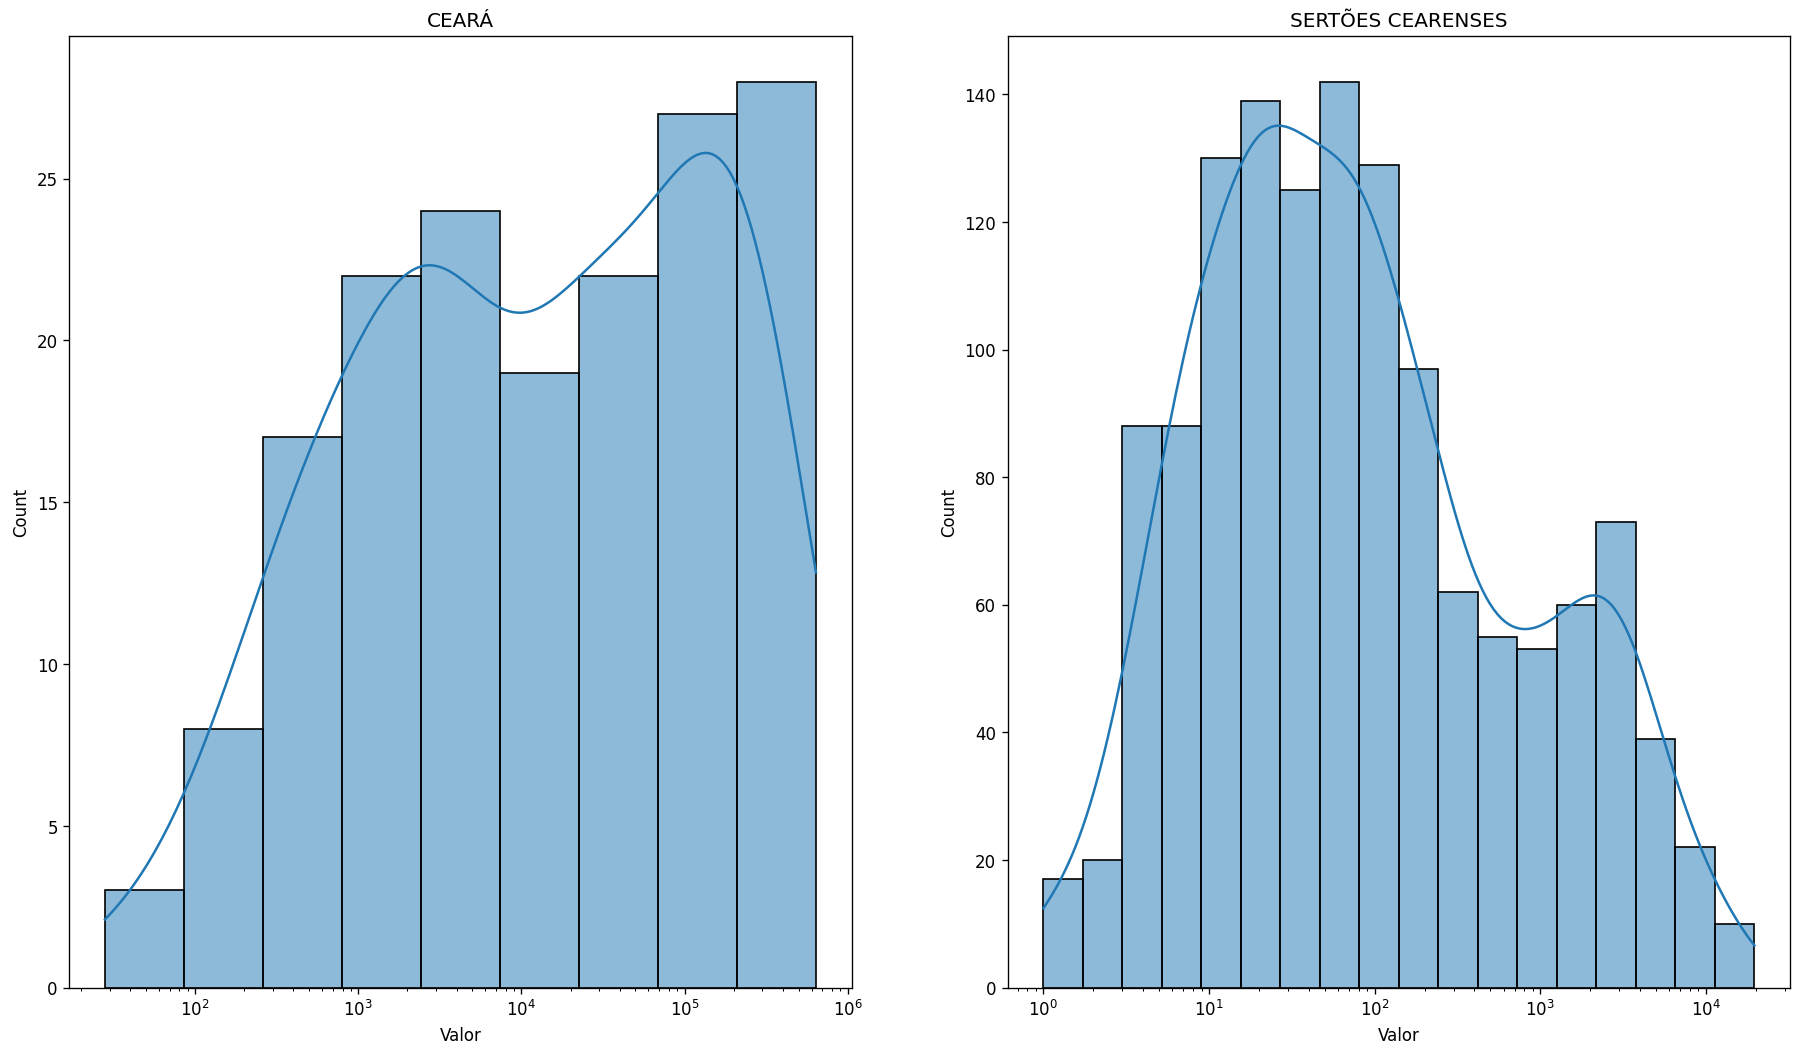

In [138]:
fig,(ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(18.5, 10.5)

sns.histplot(x=df_ce['Valor'],  kde=True, hue_norm=True,  log_scale=True, ax=ax1).set_title('CEARÁ');
sns.histplot(x=df['Valor'], kde=True, ax=ax2,   hue_norm=True, log_scale=True).set_title('SERTÕES CEARENSES');

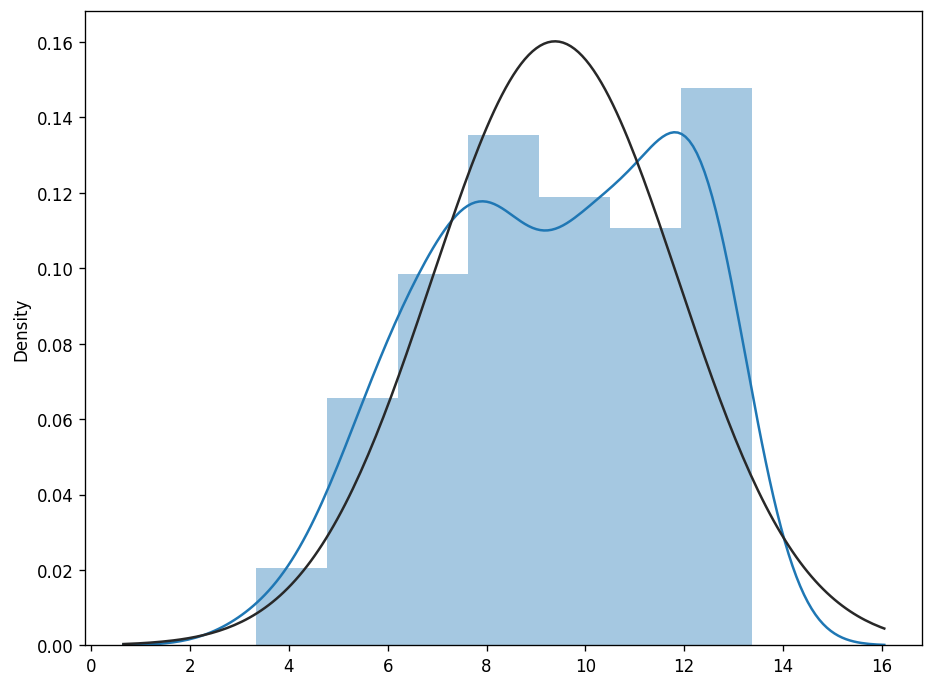

In [139]:
from scipy.stats import norm
sns.distplot(x=np.log(df_ce["Valor"]), fit=norm);

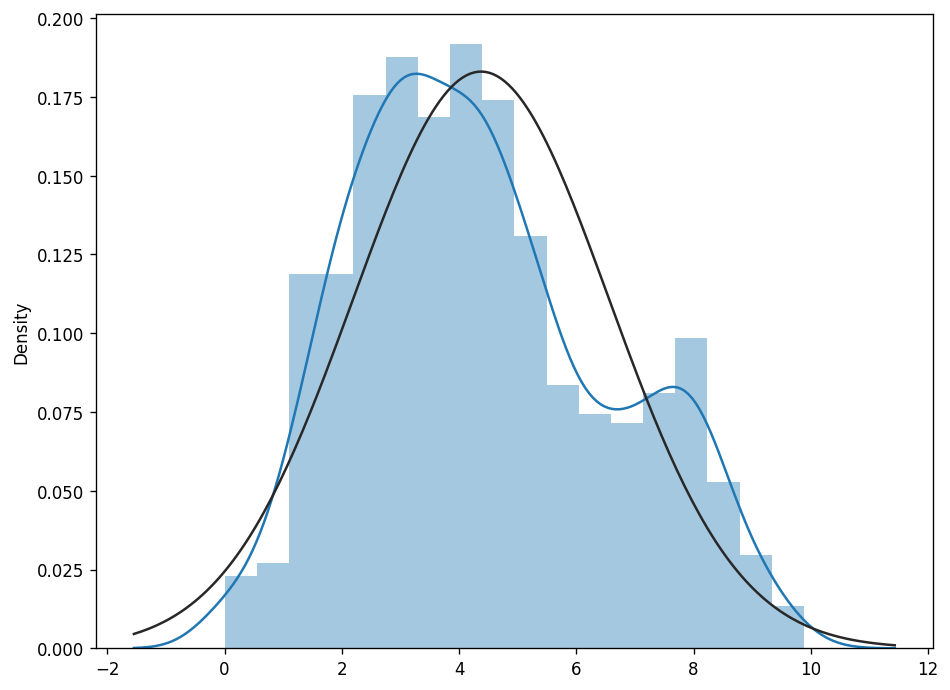

In [140]:
from scipy.stats import norm
sns.distplot(x=np.log(df["Valor"]), fit=norm);

Olhando para os gráficos acima, traçando a linha de uma distribuição gaussiana, parece que os dados são normais, mas para termos certeza de que isso seja verdade, iremos fazer os testes de normalidade.

### Testes de normalidade

1: Shapiro Wilk

     Shapiro Wilk: O teste shapiro-wilk avalia uma amostra de dados e quantifica a probabilidade de que os dados foram extraídos de uma distribuição gaussiana, nomeada para Samuel Shapiro e Martin Wilk.
2: D'Agostino 

    D'Agostino: O teste K^2 do D'Agostino calcula estatísticas sumárias dos dados, ou seja, kurtose e distorção, para determinar se a distribuição de dados se afasta da distribuição normal, nomeada para Ralph D'Agostino.
3: Anderson Darling

    Anderson Darlin: Anderson-Darling Test é um teste estatístico que pode ser usado para avaliar se uma amostra de dados vem de uma das muitas amostras de dados conhecidas, nomeada para Theodore Anderson e Donald Darling

* p <= Alfa, rejeita H0, não normal
* p > Alfa, não rejeita H0, normal 
* Hipótese nula (h0): Distribuição é normal
* Hipótese Alternativa (h1): Distribuição não é normal

In [141]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson
from statsmodels.graphics.gofplots import qqplot

def teste_normalidade(df):
    # p <= Alfa, rejeita H0, não normal
    # p > Alfa, não rejeita H0, normal 
    # Hipótese nula (h0): Distribuição é normal
    # Hipótese Alternativa (h1): Distribuição não é normal
    
    teste = anderson(df)
    print('Anderson Estatistica: %.3f' % teste.statistic)
    p = 0
    for i in range(len(teste.critical_values)):
        sl, cv = teste.significance_level[i], teste.critical_values[i]
        if teste.statistic < teste.critical_values[i]:
            print('%.3f: %.3f, Amostra é gaussiana  (Aceito a H0)' % (sl, cv))
        else:
            print('%.3f: %.3f, Amostra não é gaussiana   (Rejeita H0) e aceito a H1' % (sl, cv))
    
    print("\n")
    lista_testes = [shapiro(df), normaltest(df)]
    index = 0
    for stat, p in lista_testes:
        nome_teste = str(lista_testes[index])[0:str(lista_testes[index]).find("(")]
        index = index + 1


        print(nome_teste, ' Estatistica=%.3f, p=%.3f' % (stat, p))

        alpha = 0.05
        if p > alpha:
            print('Amostra é gaussiana (Aceito a H0)')
        else:
            print('Amostra não é gaussiana (Rejeita H0) e aceito a H1')
        
        print("\n")
    qqplot(df_ce["Valor"], line='s');   


Anderson Estatistica: 20.172
15.000: 0.563, Amostra não é gaussiana   (Rejeita H0) e aceito a H1
10.000: 0.641, Amostra não é gaussiana   (Rejeita H0) e aceito a H1
5.000: 0.770, Amostra não é gaussiana   (Rejeita H0) e aceito a H1
2.500: 0.898, Amostra não é gaussiana   (Rejeita H0) e aceito a H1
1.000: 1.068, Amostra não é gaussiana   (Rejeita H0) e aceito a H1


ShapiroResult  Estatistica=0.693, p=0.000
Amostra não é gaussiana (Rejeita H0) e aceito a H1


NormaltestResult  Estatistica=72.707, p=0.000
Amostra não é gaussiana (Rejeita H0) e aceito a H1




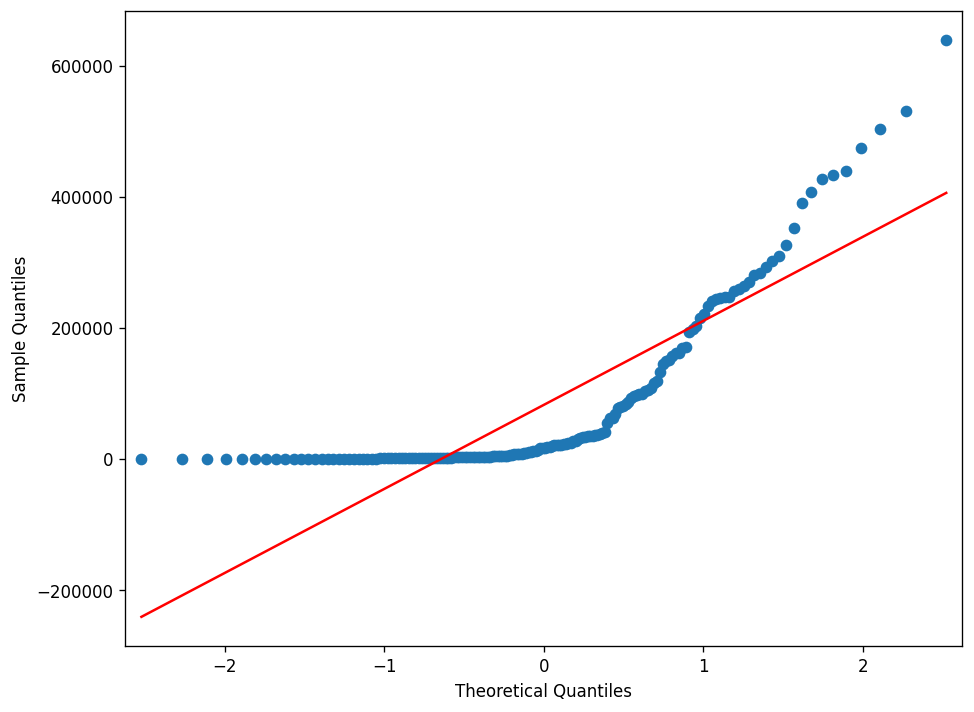

In [142]:
teste_normalidade(df_ce["Valor"])

Anderson Estatistica: 278.092
15.000: 0.574, Amostra não é gaussiana   (Rejeita H0) e aceito a H1
10.000: 0.654, Amostra não é gaussiana   (Rejeita H0) e aceito a H1
5.000: 0.785, Amostra não é gaussiana   (Rejeita H0) e aceito a H1
2.500: 0.915, Amostra não é gaussiana   (Rejeita H0) e aceito a H1
1.000: 1.089, Amostra não é gaussiana   (Rejeita H0) e aceito a H1


ShapiroResult  Estatistica=0.422, p=0.000
Amostra não é gaussiana (Rejeita H0) e aceito a H1


NormaltestResult  Estatistica=1319.757, p=0.000
Amostra não é gaussiana (Rejeita H0) e aceito a H1




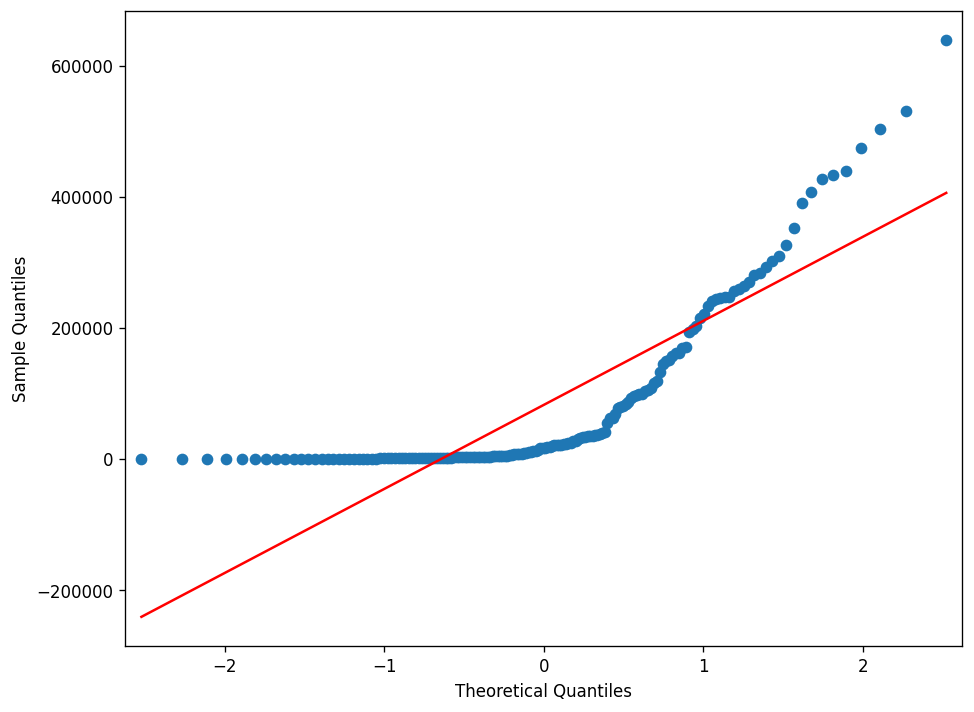

In [143]:
teste_normalidade(df["Valor"])

Análisando os dois testes de normalidades feitos, concluímos que, as duas amostras não seguem uma distribuição normal ou gaussiana.

In [144]:
from math import sqrt
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t

# Função para calcular o test-t de duas amostras independentes 
def independent_ttest(amostra_1, amostra_2, alpha):
    # Calcula a media
    mean1, mean2 = mean(amostra_1), mean(amostra_2)
    # Calcula o erro padrao
    se1, se2 = sem(amostra_1), sem(amostra_2)
    # Diferenca do erro padrão entre as duas amostras
    sed = sqrt(se1**2.0 + se2**2.0)
    # Calcula a estatistica t
    t_stat = (mean1 - mean2) / sed
    # Graus de liberdade
    df = len(amostra_1) + len(amostra_2) - 2
    # Calcula o valor crítico
    cv = t.ppf(1.0 - alpha, df)
    # Calcula o p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    # retorna tudo 
    return t_stat, df, cv, p
 

# Gera duas amostras independentes 
amostra_1 = df["Valor"]
amostra_2 = df_ce["Valor"]
# Calcula o test-t
alpha = 0.05
t_stat, dff, cv, p = independent_ttest(amostra_1, amostra_2, alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, dff, cv, p))

# valores criticos
if abs(t_stat) <= cv:
    print('Aceita H0 de que as médias são iguais.')
else:
    print('Reijeita a H0 de que as médias são iguais.')

# P-value   
if p > alpha:
    print('Aceita H0 de que as médias são iguais.')
else:
    print('Reijeita a H0 de que as médias são iguais')

t=-8.281, df=1517, cv=1.646, p=0.000
Reijeita a H0 de que as médias são iguais.
Reijeita a H0 de que as médias são iguais


### Comparação Mesorregião (Sertões Cearenses) X Mesorregião (Sertões Paraibanos) X PIB CEARA 

In [145]:
resp_pib_sertoes = req.get("https://apisidra.ibge.gov.br/values/t/5938/n6/2309300,2304103,2305605,2308609,2309409,2313203,2302404,2311306,2311405,2308500,2310506,2310902,2312700,2313005,2300408,2301505,2303600,2310308,2311900,2313302,2300309,2305654,2311264,2301851,2305266,2307635,2304269,2308351,2301257,2303931/v/37/p/last%204/d/v37%200").json()
df_pib_sertoes_cearences = pd.DataFrame(resp_pib_sertoes)

columns = []
for i in pd.DataFrame(resp_pib_sertoes).iloc[0]:
    columns.append(i)
    
df_pib_sertoes_cearences = pd.DataFrame(resp_pib_sertoes).iloc[1:]
df_pib_sertoes_cearences.columns = columns

df_pib_sertoes_cearences['Valor'] = df_pib_sertoes_cearences['Valor'].astype(int)
df_pib_sertoes_cearences["Ano"] = df_pib_sertoes_cearences["Ano"].astype(int)

In [146]:
df_pib_sertoes_cearences.head()

,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Município (Código),Município,Variável (Código),Variável,Ano (Código),Ano
1,6,Município,40,Mil Reais,261717,2309300,Nova Russas (CE),37,Produto Interno Bruto a preços correntes,2016,2016
2,6,Município,40,Mil Reais,272470,2309300,Nova Russas (CE),37,Produto Interno Bruto a preços correntes,2017,2017
3,6,Município,40,Mil Reais,275667,2309300,Nova Russas (CE),37,Produto Interno Bruto a preços correntes,2018,2018
4,6,Município,40,Mil Reais,299164,2309300,Nova Russas (CE),37,Produto Interno Bruto a preços correntes,2019,2019
5,6,Município,40,Mil Reais,666759,2304103,Crateús (CE),37,Produto Interno Bruto a preços correntes,2016,2016


In [147]:
df_pib_ce = pd.read_csv("tabela5938ce.csv", sep=";", header=0)
df_pib_ce.rename(columns={"Unnamed: 3": "PIB"}, inplace=True)

In [148]:
df_pib_ce.head(5)

,Unidade da Federação,Ano,Variável,PIB
0,Ceará,2016,Produto Interno Bruto a preços correntes (Mil ...,138422521
1,Ceará,2017,Produto Interno Bruto a preços correntes (Mil ...,147921534
2,Ceará,2018,Produto Interno Bruto a preços correntes (Mil ...,155903825
3,Ceará,2019,Produto Interno Bruto a preços correntes (Mil ...,163575327


In [149]:
df_pib_sertoes_cearences.head(5)

,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Município (Código),Município,Variável (Código),Variável,Ano (Código),Ano
1,6,Município,40,Mil Reais,261717,2309300,Nova Russas (CE),37,Produto Interno Bruto a preços correntes,2016,2016
2,6,Município,40,Mil Reais,272470,2309300,Nova Russas (CE),37,Produto Interno Bruto a preços correntes,2017,2017
3,6,Município,40,Mil Reais,275667,2309300,Nova Russas (CE),37,Produto Interno Bruto a preços correntes,2018,2018
4,6,Município,40,Mil Reais,299164,2309300,Nova Russas (CE),37,Produto Interno Bruto a preços correntes,2019,2019
5,6,Município,40,Mil Reais,666759,2304103,Crateús (CE),37,Produto Interno Bruto a preços correntes,2016,2016


In [150]:
resp_pib_sertoes_paraibanos = req.get("https://apisidra.ibge.gov.br/values/t/5938/n6/2502003,2502300,2502805,2502904,2504306,2507408,2512804,2513901,2500700,2502102,2502201,2502409,2503308,2503704,2504108,2504405,2505303,2505600,2506608,2509602,2511004,2513307,2513505,2514305,2514503,2515708,2516805,2516904,2500205,2502607,2503407,2504207,2504504,2504801,2505501,2505907,2507002,2508109,2508406,2508802,2510006,2510204,2510402,2510709,2510808,2510907,2511301,2512101,2512606,2513208,2513604,2513802,2514206,2514404,2514602,2516201,2500106,2505402,2506707,2508000,2508703,2509008,2512309,2516607,2516706,2500775,2501153,2502052,2503555,2503753,2509156,2509370,2509396,2512036,2512077,2513356,2513653,2513927,2513968,2513984,2514552,2514651,2517209/v/37/p/last%204/d/v37%200").json()
df_pib_sertoes_paraibanos = pd.DataFrame(resp_pib_sertoes_paraibanos)

columns = []
for i in pd.DataFrame(resp_pib_sertoes_paraibanos).iloc[0]:
    columns.append(i)
    
df_pib_sertoes_paraibanos = pd.DataFrame(resp_pib_sertoes_paraibanos).iloc[1:]
df_pib_sertoes_paraibanos.columns = columns

df_pib_sertoes_paraibanos['Valor'] = df_pib_sertoes_paraibanos['Valor'].astype(int)

In [151]:
df_pib_sertoes_paraibanos.head()

,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Município (Código),Município,Variável (Código),Variável,Ano (Código),Ano
1,6,Município,40,Mil Reais,59225,2502003,Belém do Brejo do Cruz (PB),37,Produto Interno Bruto a preços correntes,2016,2016
2,6,Município,40,Mil Reais,64521,2502003,Belém do Brejo do Cruz (PB),37,Produto Interno Bruto a preços correntes,2017,2017
3,6,Município,40,Mil Reais,65860,2502003,Belém do Brejo do Cruz (PB),37,Produto Interno Bruto a preços correntes,2018,2018
4,6,Município,40,Mil Reais,68297,2502003,Belém do Brejo do Cruz (PB),37,Produto Interno Bruto a preços correntes,2019,2019
5,6,Município,40,Mil Reais,37947,2502300,Bom Sucesso (PB),37,Produto Interno Bruto a preços correntes,2016,2016


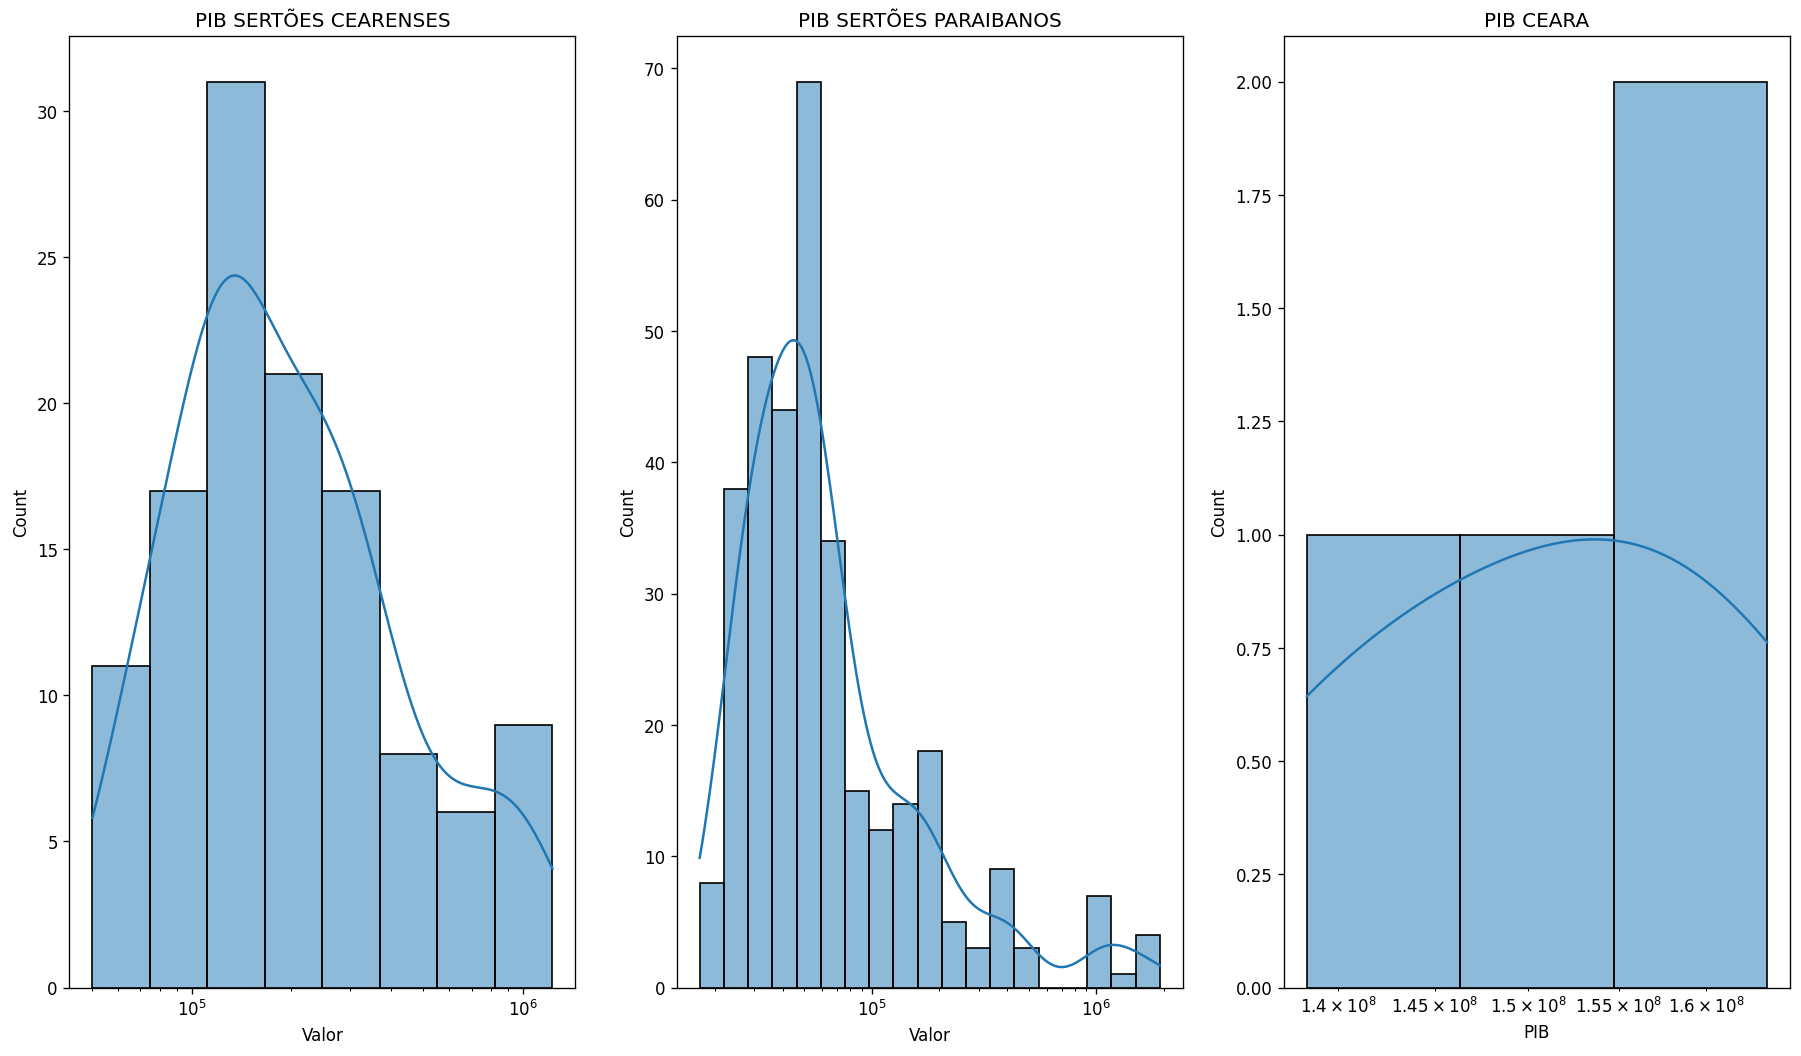

In [152]:
fig,(ax1,ax2, ax3) = plt.subplots(1,3)
fig.set_size_inches(18.5, 10.5)

sns.histplot(x=df_pib_sertoes_cearences['Valor'], kde=True, ax=ax1,   log_scale=True).set_title('PIB SERTÕES CEARENSES');
sns.histplot(x=df_pib_sertoes_paraibanos['Valor'],  kde=True, hue_norm=True,  log_scale=True, ax=ax2).set_title('PIB SERTÕES PARAIBANOS');
sns.histplot(x=df_pib_ce['PIB'],  kde=True, hue_norm=True,  log_scale=True, ax=ax3).set_title('PIB CEARA');

### Comparando os histogramas acima do pib, podemos observar que os dados dos sertões cearenses e paraibanos, tem distribuições um pouco semelhantes, onde em cada um deles, tem um pico que se destaca em relação aos demais, pois mostra-se ser o valor mais frequente das distribuições. Ambas distribuições, se assemelham com uma distribuição log-normal, pois os dados são mais ou menos simétricos ou assimétricos à direita.

### Relação PIB e Produção Mesorregião Sertões Cearenses

In [153]:
columns_groupby = ["Município", "Valor", "Ano"]
anos = [2016, 2017, 2018, 2019,]

In [154]:
filtro_pib_sertoes_cearenses = df_pib_sertoes_cearences[df_pib_sertoes_cearences["Ano"].isin(anos)][columns_groupby]

In [155]:
filtro_pib_sertoes_cearenses.head()

,Município,Valor,Ano
1,Nova Russas (CE),261717,2016
2,Nova Russas (CE),272470,2017
3,Nova Russas (CE),275667,2018
4,Nova Russas (CE),299164,2019
5,Crateús (CE),666759,2016


In [156]:
filtro_producao_sertoes_cearenses = df[df.Ano.isin(anos)][["Município", "Valor", "Ano"]].groupby(["Município", "Ano"]).sum().reset_index()

In [157]:
filtro_producao_sertoes_cearenses.head()

,Município,Ano,Valor
0,Acopiara (CE),2016,5478
1,Acopiara (CE),2017,4244
2,Acopiara (CE),2018,6007
3,Acopiara (CE),2019,7983
4,Aiuaba (CE),2016,2361


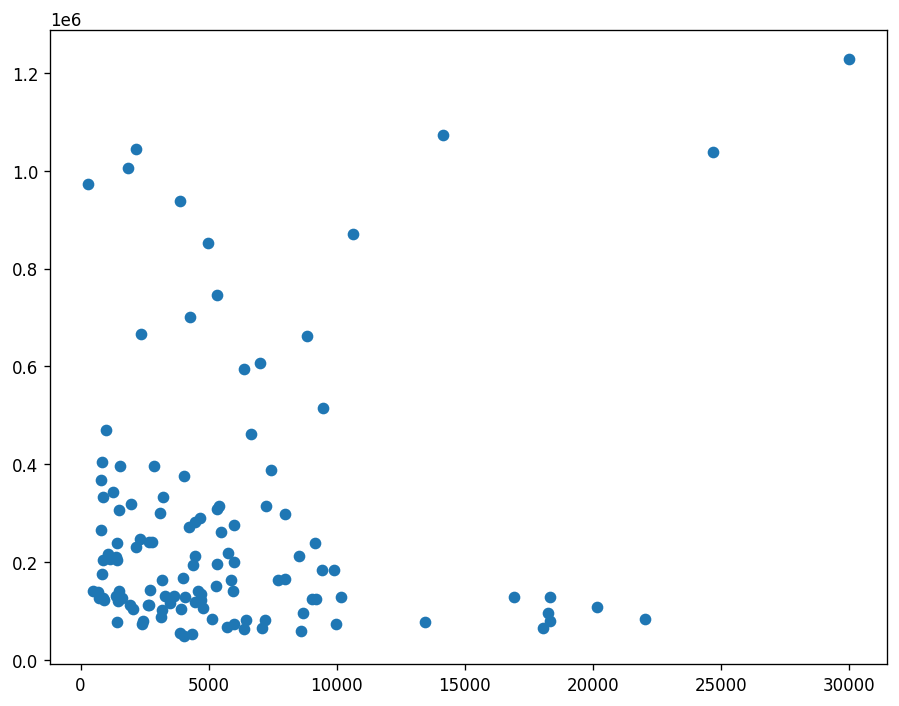

In [158]:
plt.scatter(filtro_producao_sertoes_cearenses["Valor"], filtro_pib_sertoes_cearenses["Valor"]);

No gráfico acima, aparentemente, há uma relação entre pib e produção, vamos plotar também, o coeficiente de pearson, pra vermos o quão positivo ou fraco é essa relação

In [159]:
corr = filtro_producao_sertoes_cearenses.merge(filtro_pib_sertoes_cearenses[["Município", "Valor"]], how="inner", on="Município").rename(columns={"Valor_x": "VALOR_PRODUTO", "Valor_y": "PIB"})[["VALOR_PRODUTO", "PIB"]].corr()
corr.style.background_gradient(cmap='coolwarm')

,VALOR_PRODUTO,PIB
VALOR_PRODUTO,1.000000,0.492819
PIB,0.492819,1.000000


De acordo com algumas literaturas, os coeficientes de person podem ser classificados da sequinte forma:
    
    * 0.00 a 0.19 Uma correlacao bem fraca positiva
    * 0.20 a 0.39 Uma correlacao fraca positiva
    * 0.40 a 069 Uma correlação moderada positiva
    * 0.70 a 0.89 Uma correlacao forte  positiva
    * 0.90 a 1. Uma correlacao muito forte positiva
    
A mesma ideia segue para coeficiêntes negativos

Então concluimos que, há sim uma relação forte entre pib e valor da produção e que é normal, pois valor da produção reflete diretamente no PIB.

In [160]:
filtro_pib_sertoes_cearenses

,Município,Valor,Ano
1,Nova Russas (CE),261717,2016
2,Nova Russas (CE),272470,2017
3,Nova Russas (CE),275667,2018
4,Nova Russas (CE),299164,2019
5,Crateús (CE),666759,2016
...,...,...,...
116,Ararendá (CE),84741,2019
117,Choró (CE),73022,2016
118,Choró (CE),83643,2017
119,Choró (CE),82146,2018


### Estimativas população sertões cearanses

In [161]:
resp_estimativas = req.get("https://apisidra.ibge.gov.br/values/t/6579/n6/2309300,2304103,2305605,2308609,2309409,2313203,2302404,2311306,2311405,2308500,2310506,2310902,2312700,2313005,2300408,2301505,2303600,2310308,2311900,2313302,2300309,2305654,2311264,2301851,2305266,2307635,2304269,2308351,2301257,2303931/v/all/p/2016,2017,2018,2019,2020").json()

columns = []
for i in pd.DataFrame(resp_estimativas).iloc[0]:
    columns.append(i)

df_estimativas_populacao_sertoes_cearenses = pd.DataFrame(resp_estimativas).iloc[1:]
df_estimativas_populacao_sertoes_cearenses.columns = columns
df_estimativas_populacao_sertoes_cearenses["Valor"] = df_estimativas_populacao_sertoes_cearenses["Valor"].astype(int)

In [162]:
columns_groupby = ["Município", "Valor"]
ano = "2020" 
df_estimativas_populacao = df_estimativas_populacao_sertoes_cearenses[df_estimativas_populacao_sertoes_cearenses.Ano == ano][columns_groupby].groupby("Município").sum().reset_index().sort_values("Valor", ascending=False).head()

In [163]:
fig = px.bar(df_estimativas_populacao.sort_values("Valor", ascending=False), 
             y='Valor', 
             x='Município', 
             title="LOCALIDADES COM MAIOR POPULAÇÃO")
fig.show()

Interessante notar que, embora Crateús esteja em terceiro lugar na população, ela ainda é a que mais produz.

### Tem alguma relação entre, a estimativa da população e a produção? 

In [164]:
dd1 = df_estimativas_populacao_sertoes_cearenses[df_estimativas_populacao_sertoes_cearenses["Ano"] == "2019"][["Município", "Valor"]]

In [165]:
dd2 = df[["Município", "Valor"]].groupby(["Município"]).sum().reset_index()

In [166]:
dd1 = dd1.merge(dd2, how="inner", on="Município").rename(columns={"Valor_x": "vl_produto", "Valor_y": "estimativas"})

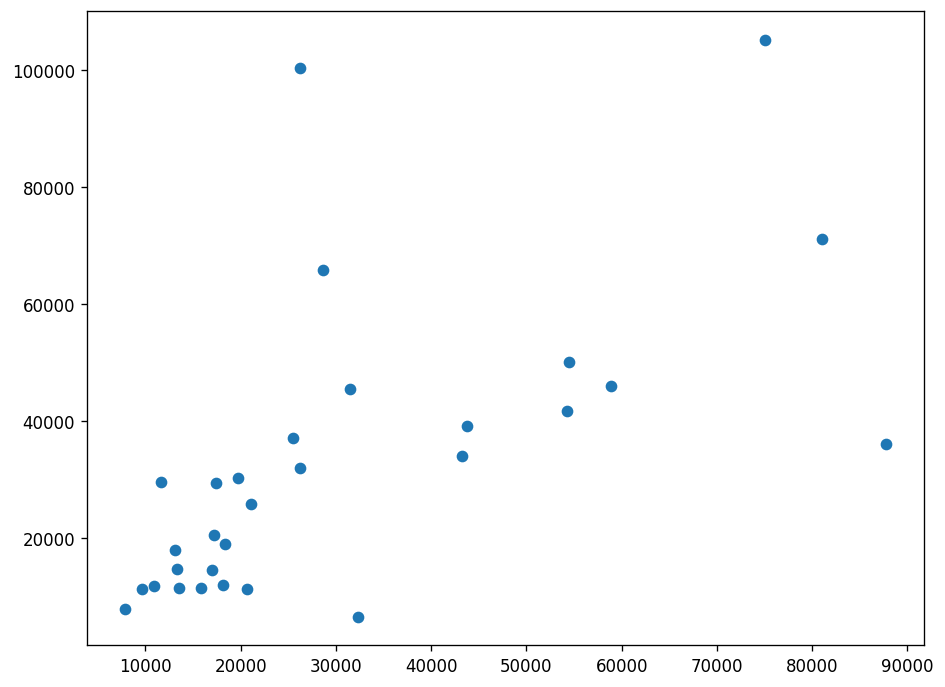

In [167]:
plt.scatter(dd1["vl_produto"], dd1["estimativas"])

In [168]:
corr = dd1[["vl_produto", "estimativas"]].corr()
corr.style.background_gradient(cmap='coolwarm')

,vl_produto,estimativas
vl_produto,1.000000,0.617383
estimativas,0.617383,1.000000


Ou seja, podemos concluir que, quanto maior a estimativa da população, maior será o impacto positivo na produção dos produtos, que já é algo normal(esperado)

### Projetando produtos produzidos para 2021 e 2022
#### Sabemos que já existe bibliotecas mais robustas quando se trata de series temporais, como por exemplo, a biblioteca do facebook PROPHET, que nela tem um conjunto de bibliotecas de series temporais, porém, nesse estudo, ultilizaremos a SARIMAX da biblioteca STATSMODELS.

In [169]:
resp_time_series_producao  = req.get("https://apisidra.ibge.gov.br/values/t/5457/n6/2309300,2304103,2305605,2308609,2309409,2313203,2302404,2311306,2311405,2308500,2310506,2310902,2312700,2313005,2300408,2301505,2303600,2310308,2311900,2313302,2300309,2305654,2311264,2301851,2305266,2307635,2304269,2308351,2301257,2303931/v/215/p/last%2021/c782/allxt").json()

In [170]:
columns = []
for i in pd.DataFrame(resp_time_series_producao).iloc[0]:
    columns.append(i)
    
df_time_series_producao = pd.DataFrame(resp_time_series_producao).iloc[1:]
df_time_series_producao.columns = columns

In [171]:
df_time_series_producao["Ano"] = df_time_series_producao.Ano.astype(int)#df_time_series_producao["Ano"].apply(lambda x: pd.to_datetime("01-01-"+str(x)))
df_time_series_producao["Valor"]  = df_time_series_producao["Valor"].replace("-", 0).replace("...", 0).astype(float)

In [172]:
df_train = df_time_series_producao[["Valor", "Ano"]].groupby([ "Ano"]).sum().reset_index()

In [173]:
df_train = df_train.set_index("Ano")

In [174]:
df_train["Valor"] = df_train["Valor"].astype("int")

In [175]:
df_train.to_csv("produtos_produzidos.csv")

In [176]:
df_train = pd.read_csv("produtos_produzidos.csv", parse_dates=[0])

In [177]:
df_train = df_train.set_index("Ano")

In [178]:
#df_train["Valor"] = df_train["Valor"].astype(int)

In [179]:
#min_date = df_train.Ano.min()
#df_train["Tempo"] = df_train.Ano - min_date

In [180]:
df_train.head()

,Valor
Ano,
2000-01-01,101904
2001-01-01,62552
2002-01-01,167500
2003-01-01,191602
2004-01-01,115425


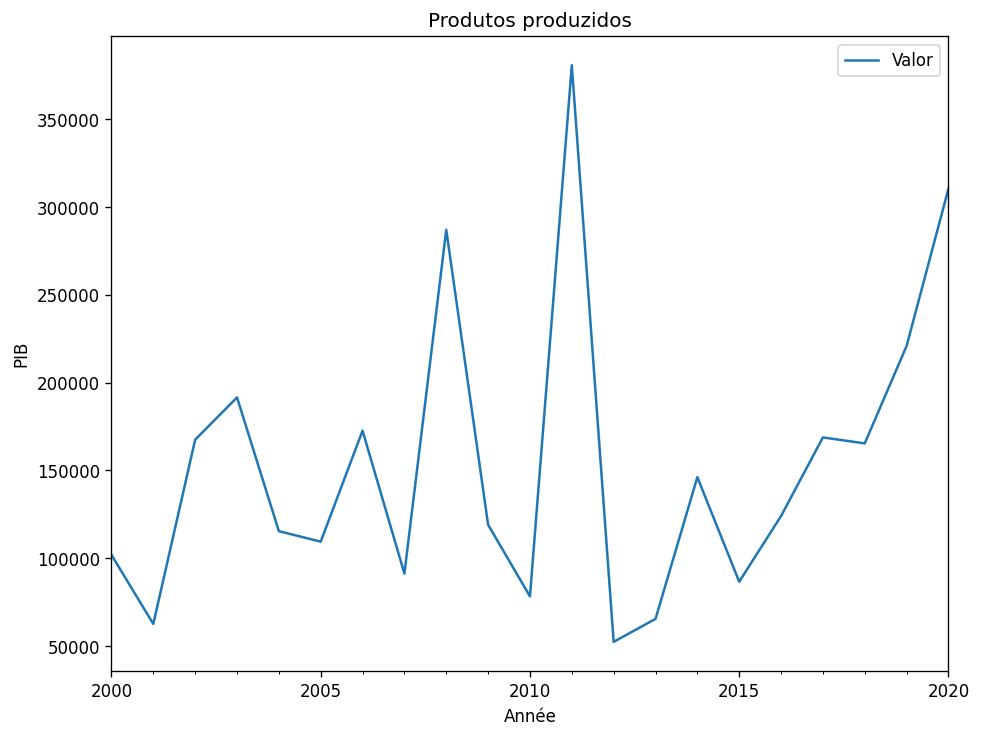

In [181]:
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from pandas import DataFrame
#from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

from matplotlib import pyplot

TEST_SIZE = 2



series = df_train#read_csv('france-pib.csv', header=0, parse_dates=[0], index_col=0)

train, test = series.iloc[:series.shape[0] - TEST_SIZE], series.iloc[-TEST_SIZE:]

series.head()

series.plot(title="Produtos produzidos").set(xlabel="Année", ylabel="PIB")
pyplot.show()



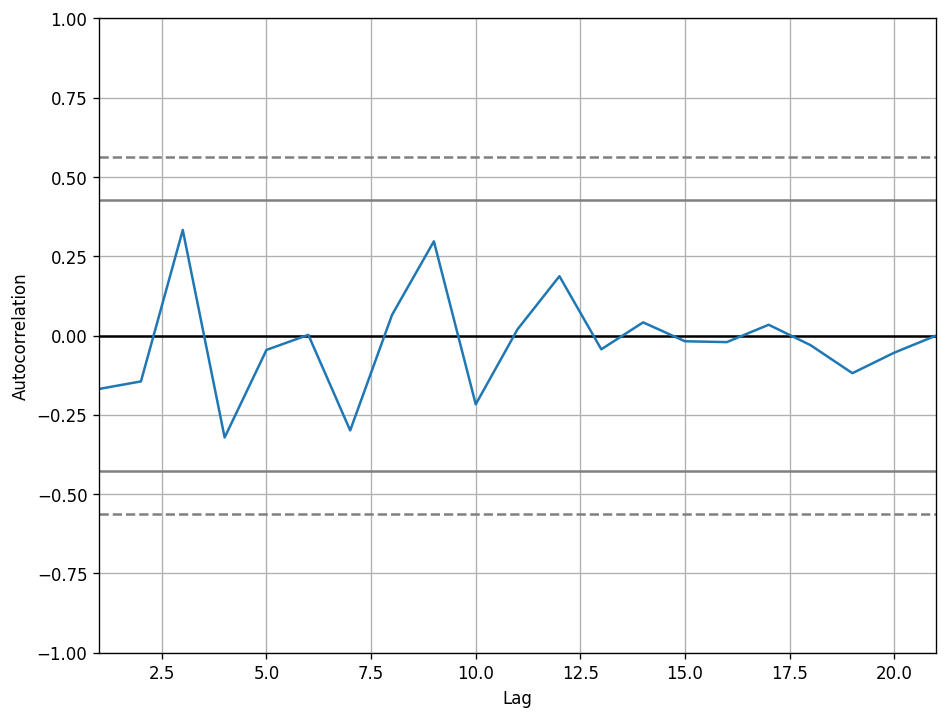

In [182]:
autocorrelation_plot(series);

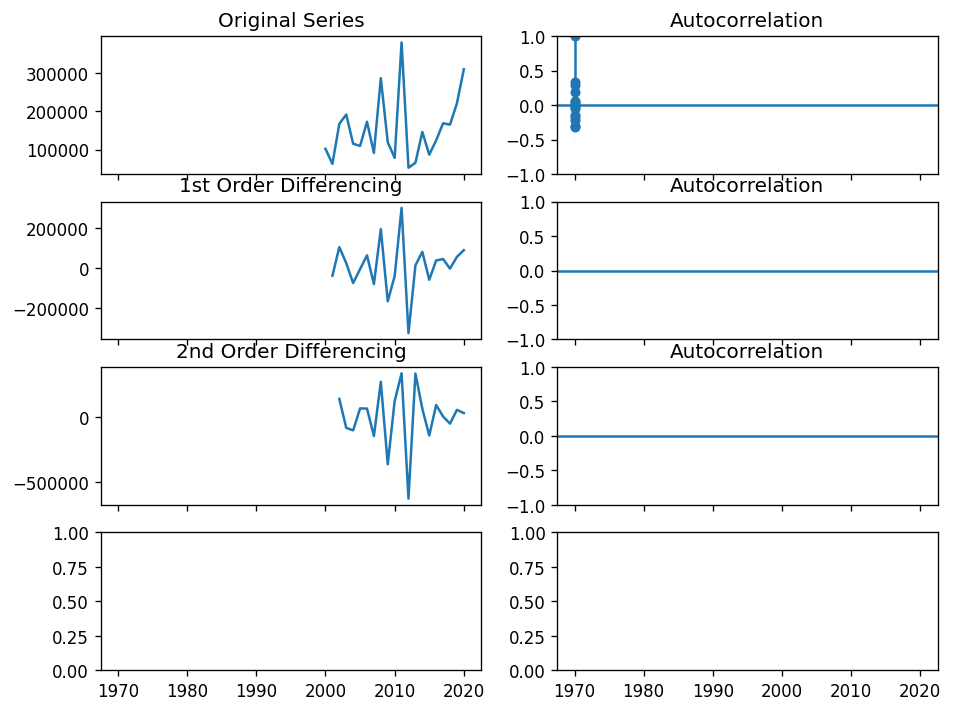

In [183]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(4, 2, sharex=True)
axes[0, 0].plot(series); axes[0, 0].set_title('Original Series')
plot_acf(series, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(series.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(series.diff(), ax=axes[1, 1])
diffval = series.diff()

# 2nd Differencing
axes[2, 0].plot(diffval.diff());
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(diffval.diff(), ax=axes[2, 1])
plt.show()


# 2nd Differencing
axes[3, 0].plot(diffval.diff().diff());
axes[3, 0].set_title('2nd Order Differencing')
plot_acf(diffval.diff().diff(), ax=axes[2, 1])
plt.show()

Com até duas ordens de diferenciação, conseguimos ter um resultado melhor.

In [184]:
# p, q, d
# p: Número de lags 
# d: Numero de diferenciações
# q: médias móveis. 

simplefilter("ignore")
model = sm.tsa.statespace.SARIMAX(train, trend='t', order=(12,1,1))
model_fit = model.fit(disp=False, maxiter=250)
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Valor   No. Observations:                   19
Model:              SARIMAX(12, 1, 1)   Log Likelihood           -41642705.274
Date:                Thu, 10 Feb 2022   AIC                       83285440.549
Time:                        19:07:38   BIC                       83285453.905
Sample:                    01-01-2000   HQIC                      83285442.390
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0038   2.48e-09   1.54e+06      0.000       0.004       0.004
ar.L1          0.5932   1.87e-07   3.17e+06      0.000       0.593       0.593
ar.L2          1.0013    3.7e-08   2.71e+07      0.000       1.001       1.001
ar.L3          0.1792   2.43e-08   7.37e+06      0.000       0.179       0.179
ar.L4         -0.7327   1.98e-08  -3.69e+07      0.000      -0.733      -0.733
ar.L5         -0.5555   7.52e-08  -7.39e+06      0.000      -0.556      -0.556
ar.L6         -0.0128   4.96e-09  -2.58e+06      0.000      -0.013      -0.013
ar.L7          0.5443   7.08e-08   7.69e+06      0.000       0.544       0.544
ar.L8          0.7527   2.12e-08   3.56e+07      0.000       0.753       0.753
ar.L9         -0.1442   1.22e-08  -1.18e+07      0.000      -0.144      -0.144
ar.L10        -0.9956   3.42e-08  -2.91e+07      0.000      -0.996      -0.996
ar.L11        -0.6265   1.85e-07  -3.39e+06      0.000      -0.627      -0.627
ar.L12         0.9754      8e-09   1.22e+08      0.000       0.975       0.975
ma.L1         -0.9629   5.28e-08  -1.82e+07      0.000      -0.963      -0.963
sigma2       107.2665   6.48e-06   1.66e+07      0.000     107.266     107.266
===================================================================================
Ljung-Box (L1) (Q):                   1.57   Jarque-Bera (JB):                 3.19
Prob(Q):                              0.21   Prob(JB):                         0.20
Heteroskedasticity (H):        30263381.32   Skew:                             0.78
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [185]:
series["valor_forecast"] = model_fit.predict(start=1,end=series.shape[0],dynamic=True)

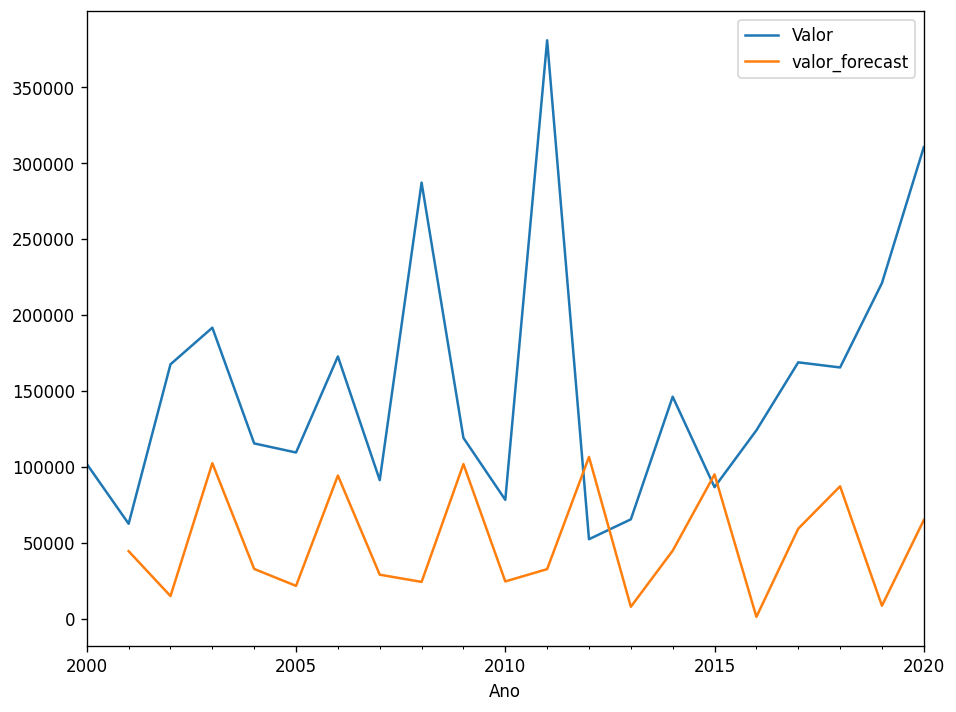

In [186]:
series.plot();

In [187]:
simplefilter("ignore")
model_fit.predict(start=series.shape[0] - 2,
                  end=series.shape[0] + 1,
                  dynamic=True)

2019-01-01    243901.096639
2020-01-01    352912.153548
2021-01-01    104424.461132
2022-01-01    181471.779942
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [188]:
simplefilter("ignore")
prediction_series = model_fit.predict(start=series.shape[0] - 2,end=series.shape[0] + 1 , dynamic=True, return_conf_int=True)

### Calcula o médio absoluto do erro do modelo

In [189]:
np.mean(abs(series.dropna()["Valor"] - series.dropna()["valor_forecast"]))

112106.96765206472

In [190]:
prediction_series

2019-01-01    243901.096639
2020-01-01    352912.153548
2021-01-01    104424.461132
2022-01-01    181471.779942
Freq: AS-JAN, Name: predicted_mean, dtype: float64

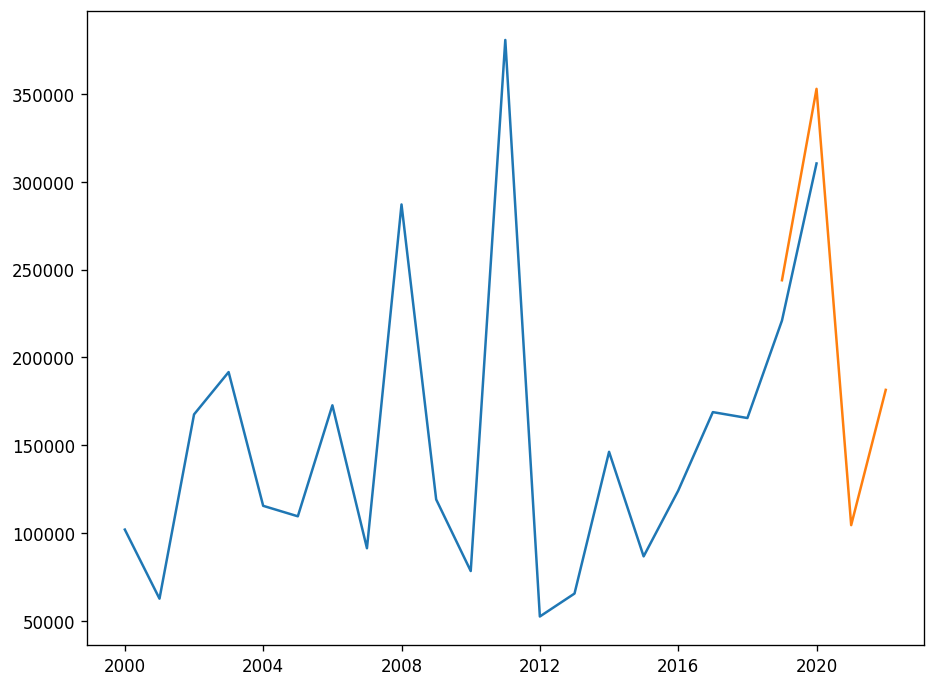

In [191]:
#fig, ax = plt.subplots(1, 1, figsize=(15, 6))

plt.plot(series.Valor)
plt.plot(prediction_series)

### Com um lag de 12, um número de diferenciações de 1 e uma média móvel de 1, nós obtivemos um modelo, obtivemos um resultado não muito bom, isso porque estamos testando o modelo com outros parâmetros e também, porque não testamos algumas métricas de maneira mais precisa, como por exemplo, autocorrelação, número de diferenciações e etc... Portanto, nosso modelo prever uma queda brusca na produção para 2021 e uma subida para 2022. 